# Exercise - logistic regression

In [46]:
import numpy as np
import matplotlib.pyplot as plt

## Sonar dataset

In this exercise, you will solve a binary classification problem solved using logistic regression. The dataset consists of 60 features corresponding to sonar measurements, with a binary label that indicates whether the sample is a rock (0) or a mine (1).

In [47]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [48]:
data = np.loadtxt("data/logistic_regression/sonar.csv", delimiter = ",")
X = data[:, :-1]
y = data[:, -1]
len(X)

208

In [49]:
# shuffling of the dataset
np.random.shuffle(data)
num_features = X.shape[1]
X_shuffled = data[:,:num_features]
y_shuffled = data[:,num_features]

1. Standardize the shuffled dataset according to the mean and the standard deviation over the samples. Split the dataset into training (80%) and test (20%) sets.

In [50]:
# standardization of the dataset
mean_X = np.mean(X_shuffled, axis=0)
std_X = np.std(X_shuffled, axis=0)
X_norm = (X_shuffled-mean_X)/std_X

In [51]:
n_samples_train = int(0.8*len(X))

# train-test split
X_train=X_norm[:n_samples_train]
X_test=X_norm[n_samples_train:]

# adding column of ones
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

y_train=y_shuffled[:n_samples_train].reshape(-1,1)
y_test=y_shuffled[n_samples_train:].reshape(-1,1)

2. Use the _LogisticRegression_ class from the example (toy dataset) to build and train a model. Adjust the number of epochs and learning rate. Plot the cost vs epochs.

In [58]:
eps = 1e-13

class LogisticRegression:
    def __init__ (self, num_features):
        self.weights = np.random.random_sample((num_features + 1,1))
        
    def fit(self, X, y, epochs, learning_rate):
        self.losses=[]

        N = X.shape[0]
                
        for i in range(epochs):
            # compute sigma(Xw)
            outputs = self.activation(X)
            residuals = outputs-y
            # update weights
            self.weights -= learning_rate/N*X.T @ residuals
            # compute the cost
            loss = (-y.T @ np.log(outputs + eps)-(1 - y.T) @ np.log(1 - outputs + eps))/N
            self.losses.append(loss.item())
        
    def activation(self, X):
        return sigmoid(X @ self.weights)   
        
    def predict(self, X):        
        return np.where(self.activation(X)>=0.5,1,0)

In [77]:
lr=LogisticRegression(num_features=num_features)
lr.fit(X=X_train, y=y_train, epochs=10000, learning_rate=0.1)

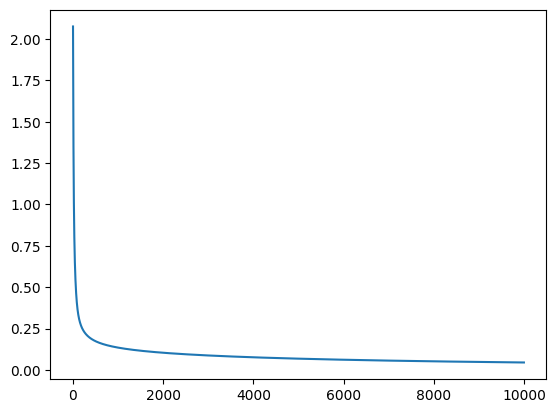

In [78]:
# Ploting cost value vs number of iterations
plt.plot(np.arange(1,len(lr.losses)+1,1),lr.losses)
plt.show()

3. Evaluate the misclassifications (number of wrong classifications) over the training and the test sets. Compute the accuracy (number of correct classifications/number of samples) over the training and the test sets.

In [79]:
train_prediction = lr.predict(X_train)
test_prediction=lr.predict(X_test)
missclassification_train = (y_train!=train_prediction).sum()
missclassification_test = (y_test!=test_prediction).sum()
print('Misclassifications Training:', missclassification_train)
print('Misclassifications Test:',missclassification_test)
print('Accuracy Training:', 1 - missclassification_train/X_train.shape[0])
print('Accuracy Test:', 1 - missclassification_test/X_test.shape[0])

Misclassifications Training: 0
Misclassifications Test: 12
Accuracy Training: 1.0
Accuracy Test: 0.7142857142857143
